# 角点检测 Fast算法
# 1. 介绍
FAST(Fast Algorithm for Corner Detection)算法是一种高效的角点检测算法，它是基于机器学习的，由Edward Rosten和Tom Drummond在2006年发表的论文《Machine learning for high-speed corner detection》中提出。该算法的思想是：对于一个像素点，如果它的邻域内有n个连续的像素点的灰度值都比该像素点的灰度值加上或者减去一个阈值T大或者小，则该像素点被认为是角点。这里的连续的像素点是指这些像素点在顺时针或者逆时针方向上是连续的。这里的阈值T是一个经验值，一般取10。这里的n是一个参数，一般取12。这里的邻域是指像素点周围的16个像素点。这里的角点是指像素点的灰度值在该方向上是增加还是减少。这里的角点检测是指检测图像中的所有角点。
# 2. 基本使用
## 2.1 创建对象
```python
cv2.FastFeatureDetector_create([, threshold[, nonmaxSuppression[, type]]]) -> retval
```
- threshold: 阈值
- nonmaxSuppression: 是否进行非极大值抑制
- type: 检测类型
### 2.2 检测关键点
```python
detect(image[, mask]) -> keypoints
```
- image: 输入图像
- mask: 掩码图像
- keypoints: 关键点
### 2.3 计算描述符
```python
compute(image, keypoints[, descriptors]) -> keypoints, descriptors
```
- image: 输入图像
- keypoints: 关键点
- descriptors: 描述符
### 2.4 检测关键点并计算描述符    
```python
detectAndCompute(image, mask[, descriptors[, useProvidedKeypoints]]) -> keypoints, descriptors
```
- image: 输入图像
- mask: 掩码图像
- keypoints: 关键点
- descriptors: 描述符
- useProvidedKeypoints: 是否使用提供的关键点




Threshold: 10
nonmaxSuppression:True
neighborhood: 2
Total Keypoints with nonmaxSuppression: 2495
Total Keypoints without nonmaxSuppression: 6476


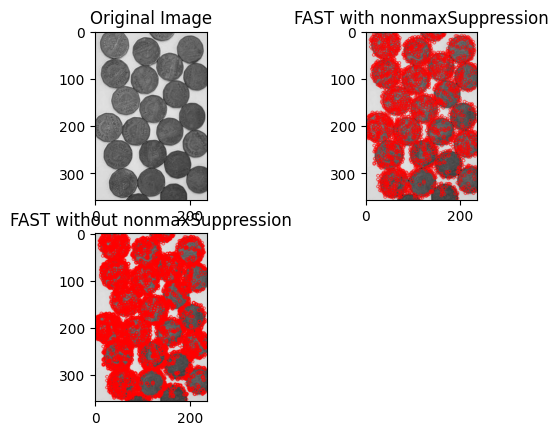

In [6]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('../data/coins.png',0)
# 用默认值初始化FAST对象
fast = cv.FastFeatureDetector_create()
# 寻找并绘制关键点
kp = fast.detect(img,None)
img2 = cv.drawKeypoints(img, kp, None, color=(255,0,0))
# 打印所有默认参数
print( "Threshold: {}".format(fast.getThreshold()) )
print( "nonmaxSuppression:{}".format(fast.getNonmaxSuppression()) )
print( "neighborhood: {}".format(fast.getType()) )
print( "Total Keypoints with nonmaxSuppression: {}".format(len(kp)) )
cv.imwrite('fast_true.png',img2)
# 关闭非极大抑制
fast.setNonmaxSuppression(0)
kp = fast.detect(img,None)
print( "Total Keypoints without nonmaxSuppression: {}".format(len(kp)) )
img3 = cv.drawKeypoints(img, kp, None, color=(255,0,0))
#展示所有中间图片,以rgb格式显示
plt.subplot(221),plt.imshow(img,'gray'),plt.title('Original Image')
plt.subplot(222),plt.imshow(img2,'gray'),plt.title('FAST with nonmaxSuppression')
plt.subplot(223),plt.imshow(img3,'gray'),plt.title('FAST without nonmaxSuppression')
plt.show()

